# M5 - W4 Assignment: Use statistical thinking and methods for modelling

## Data: Boston House Prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built prior to 1940
- **DIS:**      weighted distances to five Boston employment centres
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **B1000:**  (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars.

### Let us start by importing the required libraries

In [67]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [68]:
# reading csv data into a dataframe and viewing head
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### summary statistics

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:____**

- Crime rates average is 3.6 with very low crime rates in 50% of towns and extreme high rates in other towns.
- At least 50% of Boston towns have no zoned lands for large lot.
- The mean of CHAS is 0.07, which means that most of the houses are not on riverside.

Before performing the modeling, it is important to check the univariate distribution of the variables.

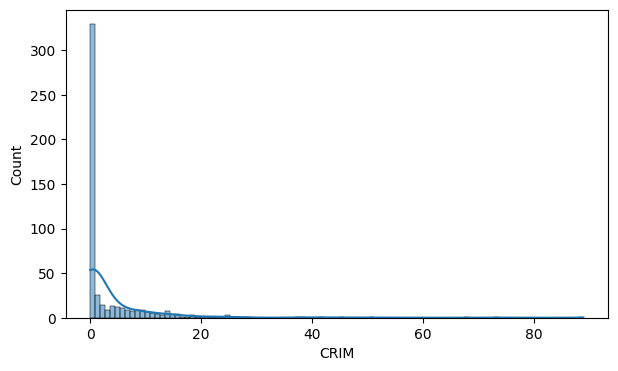

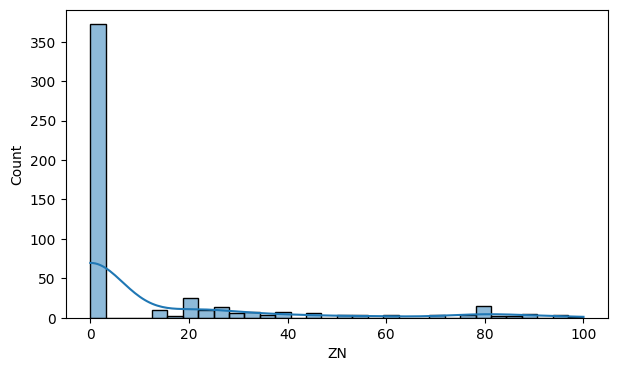

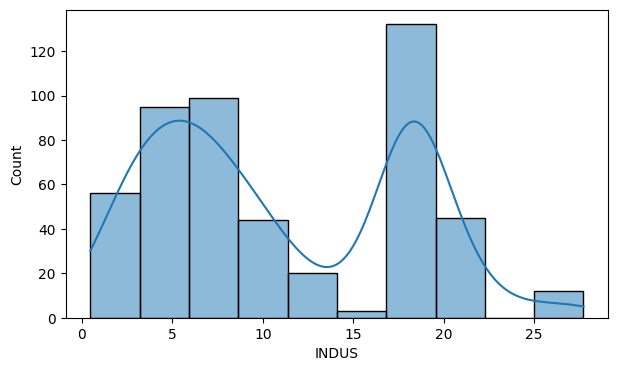

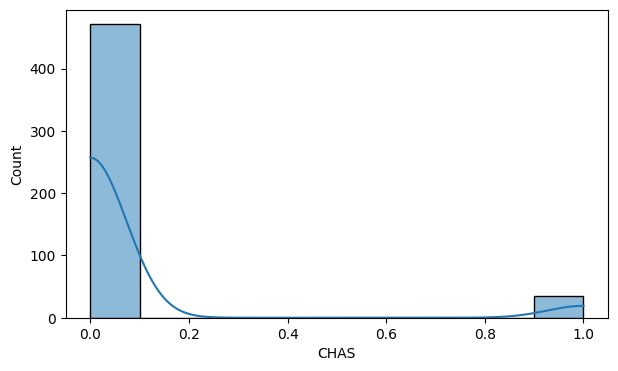

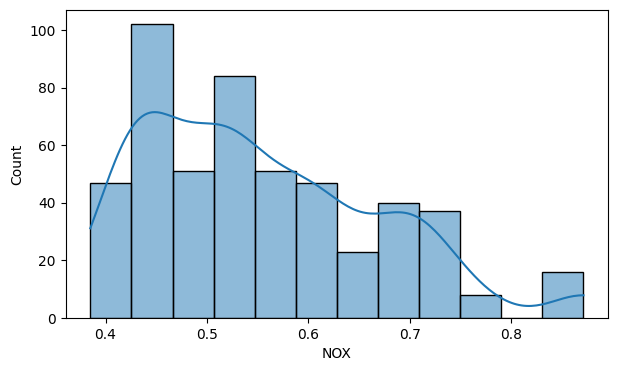

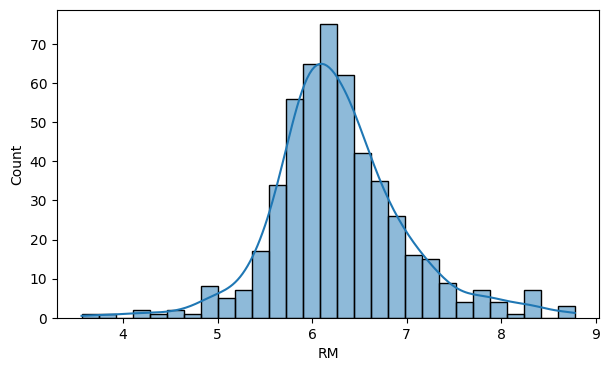

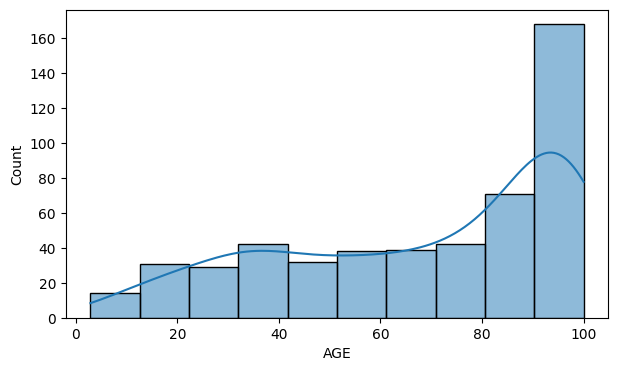

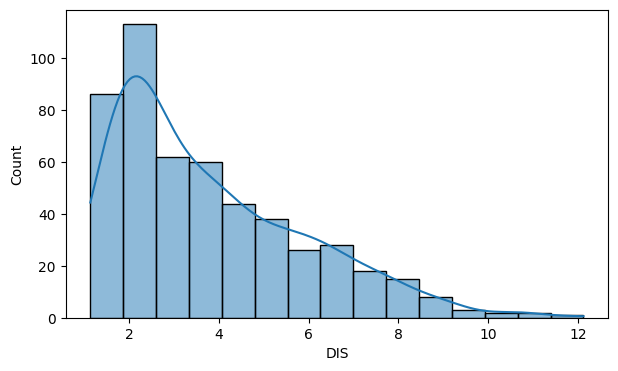

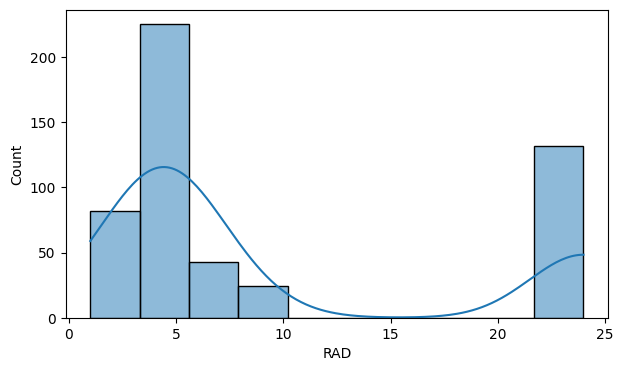

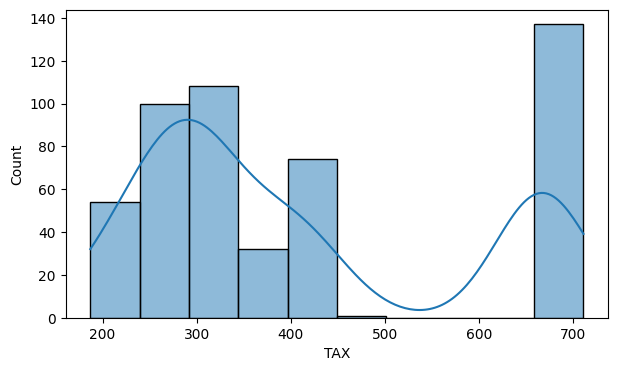

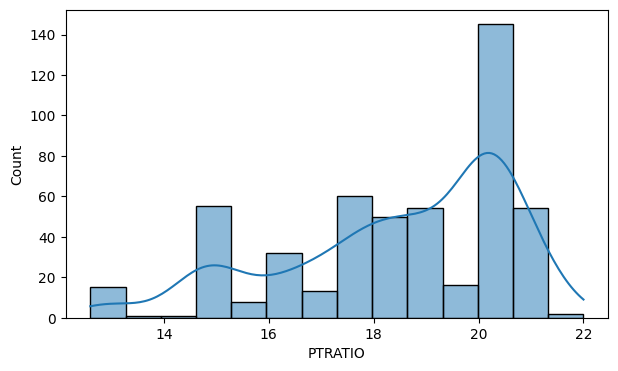

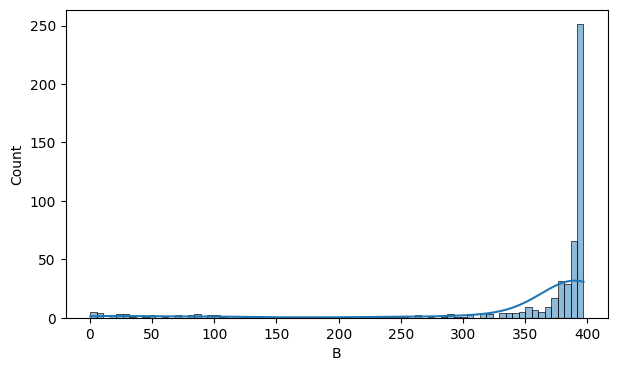

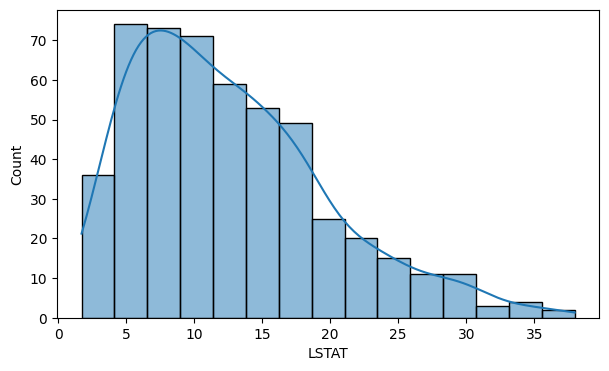

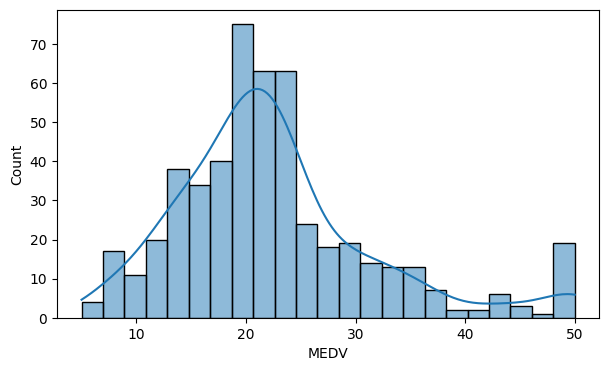

In [71]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

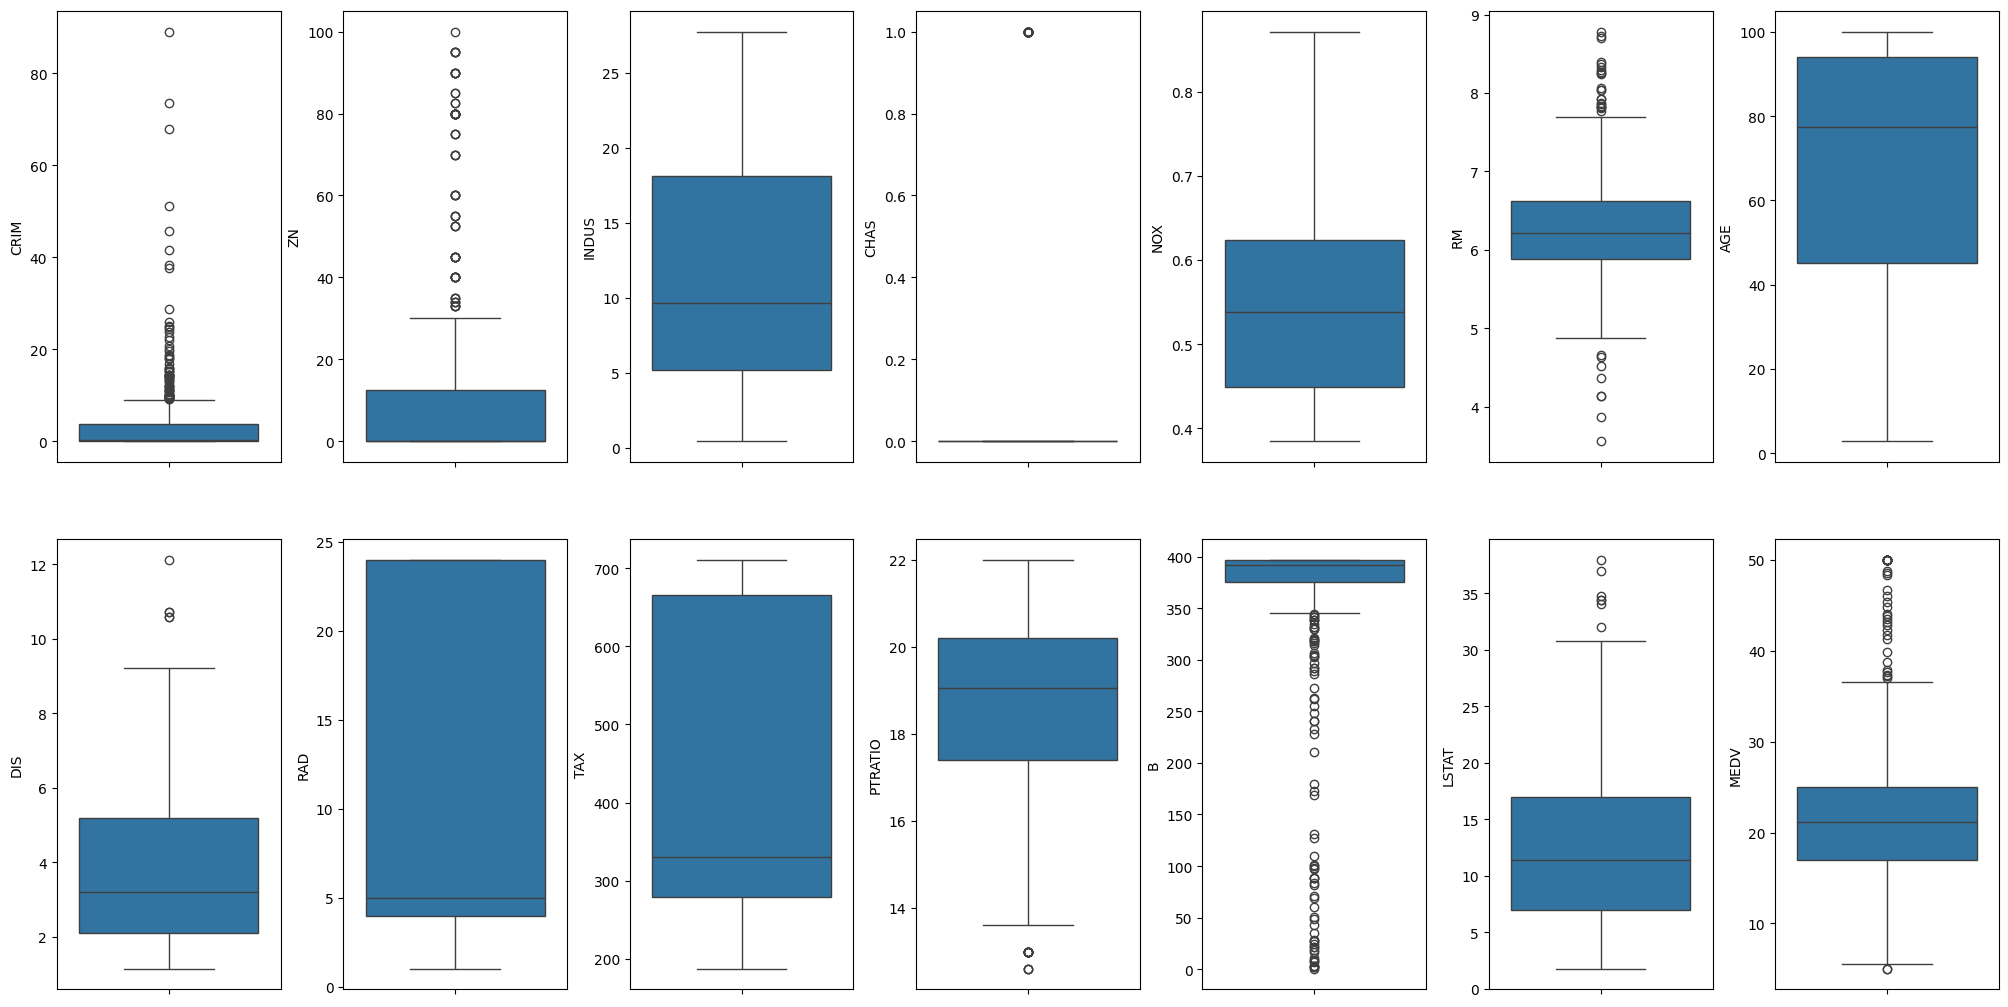

In [72]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [73]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [74]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


#### Let's check the correlation using the heatmap 

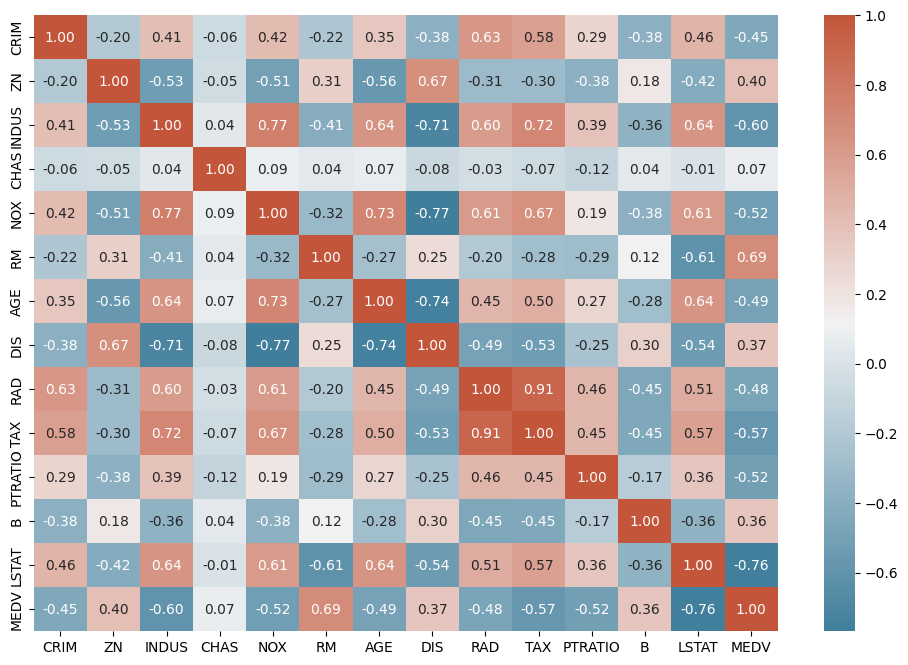

In [75]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

**Observations:______**

- Proportion of non-retail business acres is positively correlated with oxide concentration. This implies town with high non-retail business areas have higher acids emissions. Could be a causation as well.
- Also, proportion of non-retail business acres is positively correlated with taxes. This implies that higher taxes are imposed on houses in town with high non-retail business areas.
- Number of rooms is positively correlated with house value, which makes sense.
- Oxide concentration is positively correlated with old owner-occupied buildings. This could transitively imply that old houses are more centered around non-retail business areas (which is positively correlated with oxid emissions).
- Distance from employeement centers is negatively correlated with propotion of non-retail business acres, oxide concentration, and proportion of owner-occupied buildings. This says towns away from employeement centers have more recent houses and less oxide concentration.
- Prices of houses is negatively correlated with low status of population which makes much sense.

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

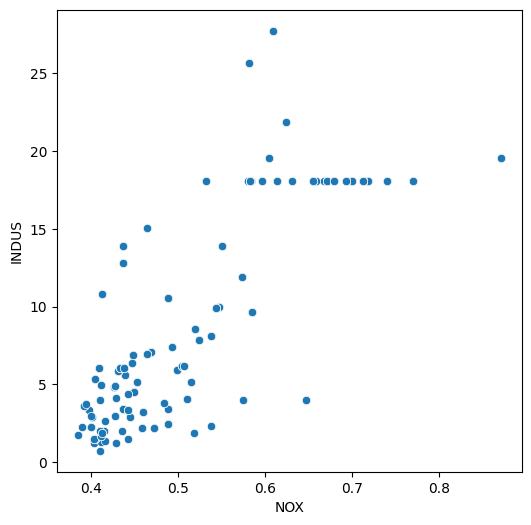

In [76]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['NOX'], y=df['INDUS'], data=df)
plt.show()

**Observations:____** It appears that there is no pattern in this correlation between the two features.

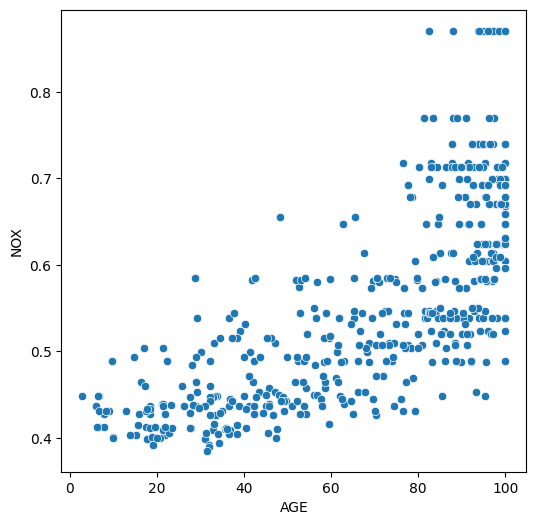

In [77]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['AGE'], y=df['NOX'], data=df)

plt.show()

**Observations:____**
- The more proportion of owner-occupied units built prior to 1940 exist, the more oxides concentration. This implies that old owner-occupied houses are located in a geographical location closer to the oxide source than more recently-built houses.

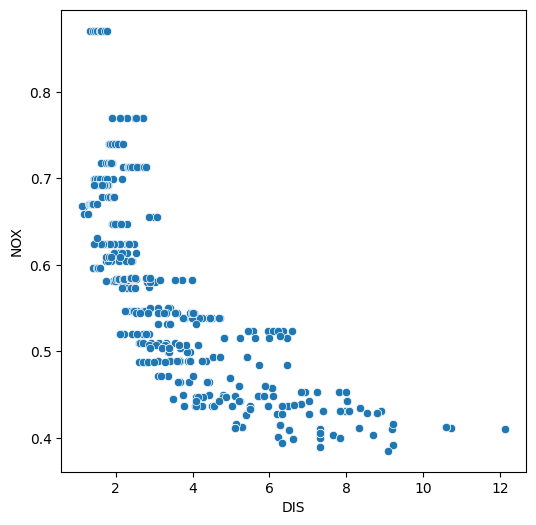

In [78]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(y=df['NOX'], x=df['DIS'], data=df)

plt.show()

**Observations:___**
- The distant the house is from employeement centers, the less oxide concentration is there. This implies that empolyeement centers location is where the oxid source lies

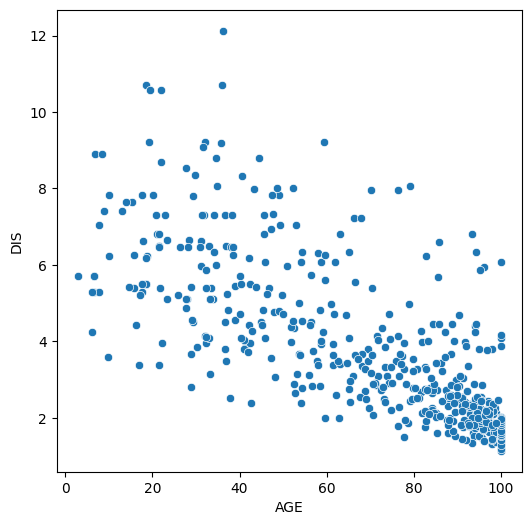

In [79]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

- This, along with the previous observations, support the assumption that old owner-occupied houses are closer to employeement centers and employeement centers are emitting oxides.

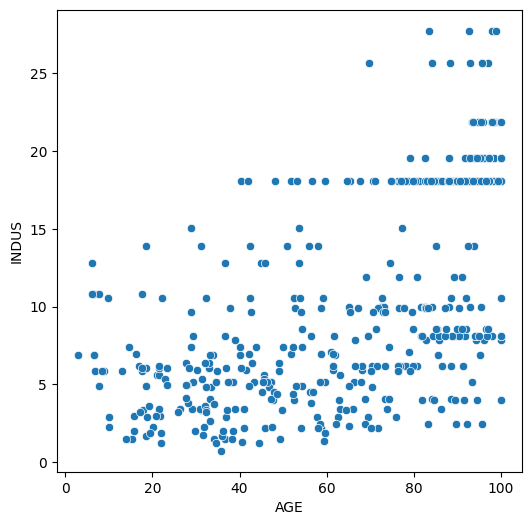

In [80]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

* No trend between the two variables is visible in the above plot.

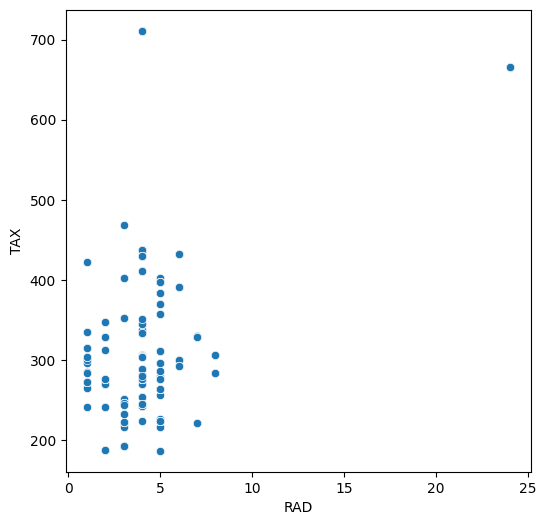

In [81]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

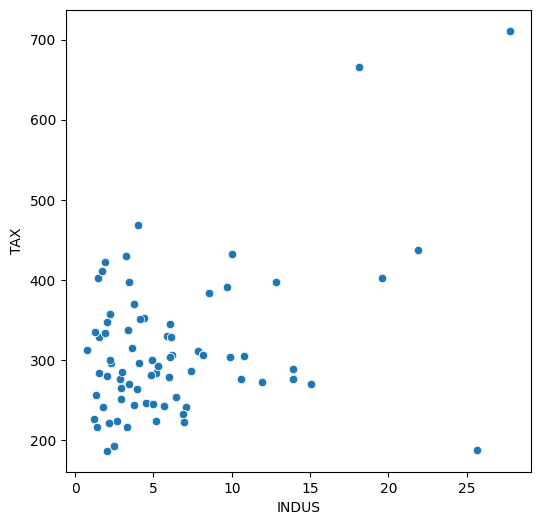

In [82]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

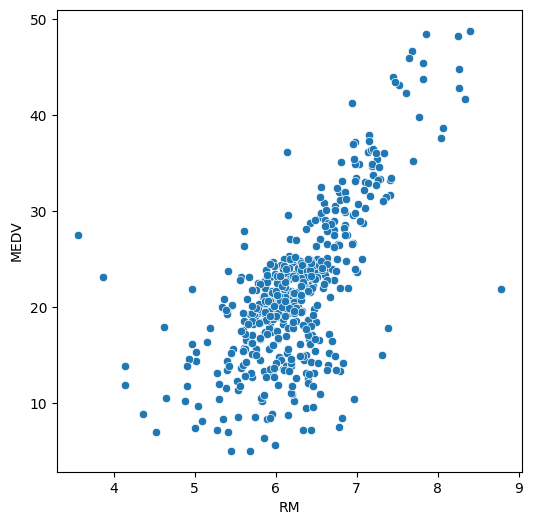

In [83]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizotal line as the MEDV value seems to be capped at 50.

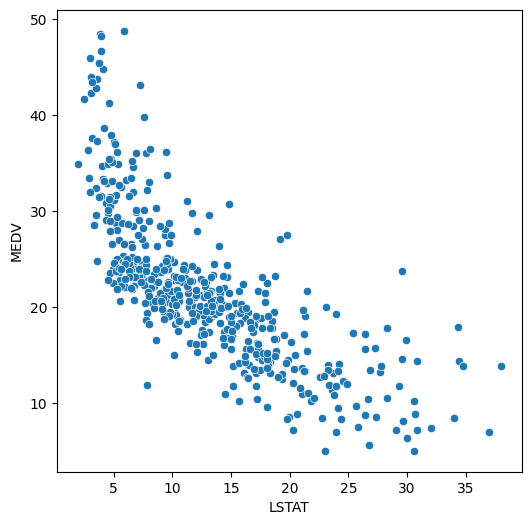

In [84]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.

* There are few outliers and the data seems to be capped at 50.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [85]:
#Split the dataset into training and testing sets (70/30 split)
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [86]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              930.6
Date:                Sun, 26 May 2024   Prob (F-statistic):                   5.03e-251
Time:                        17:33:28   Log-Likelihood:                         -937.12
No. Observations:                 343   AIC:                                      1900.
Df Residuals:                     330   BIC:                                      1950.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0879      0.038     -2.326      0.021      -0.162      -0.014
ZN             0.0445      0.014      3.254      0.001       0.018       0.071
INDUS         -0.0868      0.059     -1.478      0.140      -0.202       0.029
CHAS           1.2819      0.861      1.489      0.137      -0.411       2.975
NOX            2.4085      3.089      0.780      0.436      -3.669       8.486
RM             5.3913      0.306     17.595      0.000       4.789       5.994
AGE           -0.0408      0.013     -3.161      0.002      -0.066      -0.015
DIS           -0.8690      0.184     -4.730      0.000      -1.230      -0.508
RAD            0.1043      0.062      1.677      0.094      -0.018       0.227
TAX           -0.0087      0.004     -2.434      0.015      -0.016      -0.002
PTRATIO       -0.2795      0.108     -2.597      0.010      -0.491      -0.068
B              0.0124      0.002      5.021      0.000       0.008       0.017
LSTAT         -0.2485      0.049     -5.048      0.000      -0.345      -0.152
==============================================================================
Omnibus:                      119.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.913
Skew:                           1.409   Prob(JB):                    1.74e-119
Kurtosis:                       8.507   Cond. No.                     8.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
n = X_test.shape[0] 
p = X_test.shape[1]  

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print diagnostics
print("R-squared: %.2f" % r_squared)
print("Adjusted R-squared: %.2f" % adjusted_r_squared)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_pred))


R-squared: 0.75
Adjusted R-squared: 0.72
Mean squared error: 19.38
Mean Absolute error: 3.25


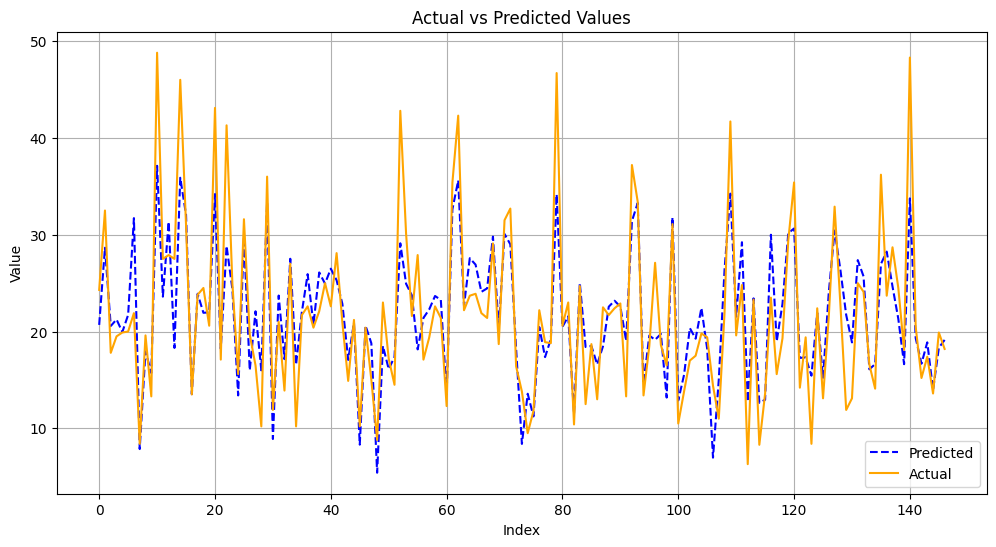

In [88]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=range(len(y_test)), y=y_pred, label='Predicted', linestyle='--', color='blue')

sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='orange')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.grid(True)

plt.show()


In [92]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of predictors

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print diagnostics
print("R-squared: %.2f" % r_squared)
print("Adjusted R-squared: %.2f" % adjusted_r_squared)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Mean Absolute error: %.2f" % mean_absolute_error(y, y_pred))

R-squared: 0.78
Adjusted R-squared: 0.77
Mean squared error: 13.73
Mean Absolute error: 2.73


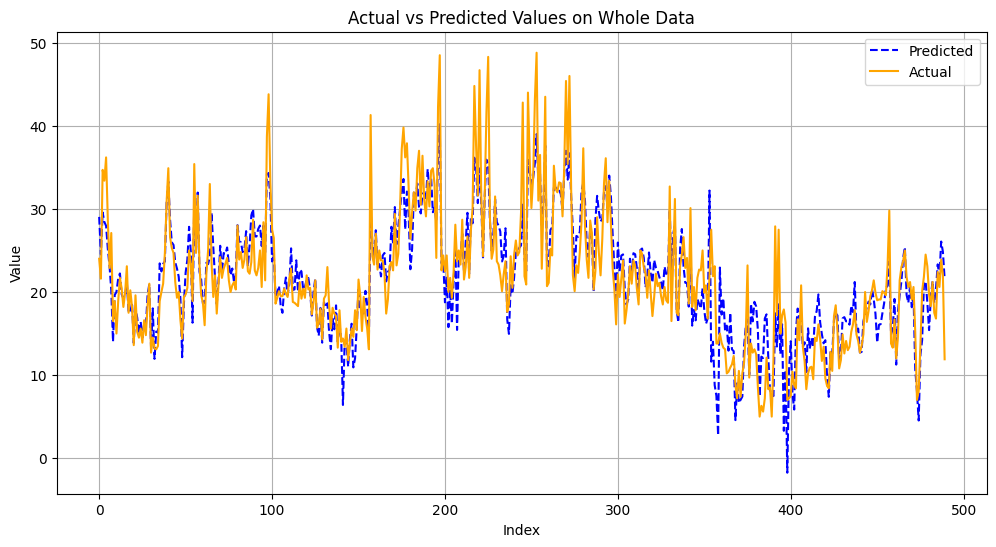

In [93]:

plt.figure(figsize=(12, 6))

sns.lineplot(x=range(len(y)), y=y_pred, label='Predicted', linestyle='--', color='blue')

sns.lineplot(x=range(len(y)), y=y, label='Actual', color='orange')

plt.title('Actual vs Predicted Values on Whole Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()
plt.grid(True)

plt.show()

In [89]:
import pandas as pd

# Assuming model is the trained linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Assuming X_test is a DataFrame with the feature names as columns
feature_names = X_test.columns

# Creating a DataFrame to display coefficients with feature names
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeff_df_sorted = coeff_df.sort_values(by='Coefficient', ascending=False)
coeff_df_sorted


,Feature,Coefficient
5,RM,3.084387
3,CHAS,1.065285
8,RAD,0.237059
1,ZN,0.043664
11,B,0.007137
9,TAX,-0.011146
6,AGE,-0.032507
2,INDUS,-0.076665
0,CRIM,-0.122654
12,LSTAT,-0.362658


## Conclusion
The model trained on the whole data shows better performance metrics across the board compared to the model trained on the 70:30 split. However, these results should be interpreted with caution. The true test of a model's performance is its ability to generalize to new, unseen data. The 70:30 split model provides a more realistic estimate of this capability. To ensure robust evaluation, further validation using cross-validation or an independent test set is recommended for the model trained on the whole data.